# Data Analysis

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as lm
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import statsmodels.api as sm
from statsmodels.formula.api import ols

Now that I've managed the data, I want to answer some questions about it using some visualizations and analyses. Specifically, I am going to figure out whether I have run further and faster more recently in my running career compared to earlier. The goal of this exercise is to familiarize myself with how to run correlations and linear models, two types of statistical tests that I will likely use in my lab in the future, as well as to acquaint myself with scatterplots and the syntax of plotting in matplotlib.

First, let's read in and view the cleaned data that I managed in df_management.ipynb.

In [3]:
d = pd.read_csv("clean.csv")

In [4]:
pd.options.display.max_rows=3000
#print(d)
print(d.tail(10))
pd.options.display.max_rows=20

            Date  Mileage time_corr  pace_min
2373  2019-11-24    14.00   1:37:02  6.930952
2374  2019-11-27     5.02   0:36:08  7.197875
2375  2019-11-28     6.15   0:42:22  6.888889
2376  2019-11-29     6.26   0:46:15  7.388179
2377  2019-11-30     3.11   0:15:44  5.058950
2378  2019-11-30     4.90       NaN       NaN
2379  2019-12-03     7.28   0:53:04  7.289377
2380  2019-12-04     9.58       NaN       NaN
2381  2019-12-05     7.00   0:50:33  7.221429
2382  2019-12-06     4.09   0:27:53  6.817441


## Descriptive and Correlational Analyses

I want to get a general sense of the data I'm working with by conducting a histogram of runs by pace, as seen in the first plot below.

Let's also check out a histogram of runs by distance (second plot below).

(array([  3.,  37.,  58.,  63.,  59., 299., 653., 372., 145.,  70.,  29.,
         15.]),
 array([ 4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,
         9.5, 10. ]),
 <a list of 12 Patch objects>)

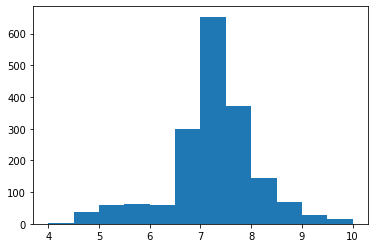

In [149]:
plt.hist(d['pace_min'], bins = [4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])

(array([ 20., 103., 122., 323., 408., 266., 266., 233., 246., 128., 119.,
         28.,  57.,  20.,  25.,  11.,   3.,   3.,   2.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

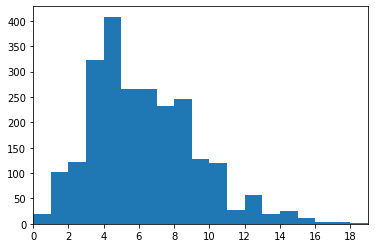

In [154]:
plt.xticks(np.arange(0, max(d['Mileage'])+1, 2.0))
plt.xlim(0,19)
plt.hist(d['Mileage'], bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

We can see in the plots above that both the pace and distance of my runs are roughly normally distributed, with the histogram for distance being slightly right-skewed. The most common pace of my runs is in the 7:00-7:30 min/mi range. The most common distance is in the 4-mile range, but there is a wider peak from 3-9 miles.

Let's back up these visualizations with some descriptive statistics. As we can see below, the mean pace of a run of mine is 7.292 minutes, or 7 minutes 18 seconds, with a standard deviation of 56 seconds. The mean distance is 6.07 miles (reflecting the right skew of the above histogram), and the standard deviation of nearly 3 miles can be visualized in the broad peak we see in the histogram.

In [155]:
d.describe()

,Mileage,pace_min
count,2383.000000,1817.000000
mean,6.073093,7.291813
std,2.928166,0.937560
min,0.250000,4.000000
25%,4.000000,6.940548
50%,5.690000,7.311234
75%,8.000000,7.705440
max,18.150000,14.930140


I want advance my visualizations and analyses a bit by graphing pace by distance on a scatterplot. We can see the resulting plot below.

Below that, I run a Pearson's R correlation test to see if there is a relationship between pace and distance. To do that, I have to create a new dataset without any NAs for the runs where I didn't log my time.

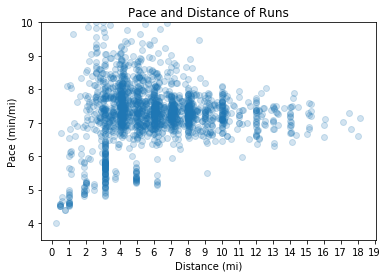

<Figure size 432x288 with 0 Axes>

In [8]:
plt.ylim(3.5, 10)
plt.scatter(d['Mileage'], d['pace_min'], alpha=0.2)
plt.xticks(np.arange(0, max(d['Mileage'])+1, 1.0))
plt.xlabel("Distance (mi)")
plt.ylabel("Pace (min/mi)")
plt.title("Pace and Distance of Runs")
plt.show()
plt.savefig("pace_distance.png")

In [9]:
dna = d.dropna()
print(dna)

            Date  Mileage time_corr   pace_min
0     2009-04-25     3.10   0:29:38   9.559140
1     2009-11-21     3.10   0:22:51   7.370968
2     2010-01-04     1.30   0:17:00  13.076923
3     2010-01-05     2.60   0:28:00  10.769231
4     2010-01-07     2.60   0:28:00  10.769231
6     2010-01-14     2.60   0:26:00  10.000000
7     2010-01-16     4.05   0:35:48   8.839506
8     2010-01-19     2.60   0:24:00   9.230769
9     2010-01-25     2.66   0:24:15   9.116541
10    2010-01-26     2.60   0:24:19   9.352564
...          ...      ...       ...        ...
2370  2019-11-21     6.21   0:44:23   7.147075
2371  2019-11-22     8.22   0:58:04   7.064071
2373  2019-11-24    14.00   1:37:02   6.930952
2374  2019-11-27     5.02   0:36:08   7.197875
2375  2019-11-28     6.15   0:42:22   6.888889
2376  2019-11-29     6.26   0:46:15   7.388179
2377  2019-11-30     3.11   0:15:44   5.058950
2379  2019-12-03     7.28   0:53:04   7.289377
2381  2019-12-05     7.00   0:50:33   7.221429
2382  2019-12

In [77]:
st.pearsonr(dna['Mileage'], dna['pace_min'])

(0.06038241790413832, 0.010039784744218246)

The first number output above is the r statistic, and the second number is the p-value. Turns out, there is a significant correlation according to the p-value; however, Pearson's r is so small that it is doubtful there is much difference in pace based on the run's distance. The significant p-value is easy to achieve with a sample size of 1817, with even the smallest differences biasing the statistic towards significance.

I also ran a linear regression on the data to ensure I got similar results. The R-squared value of less than .01 emphasizes the smallness of the differences present in the pace-by-distance data.

In [12]:
x = np.array(dna['Mileage'].tolist())
x = x.reshape(-1, 1)
y = np.array(dna['pace_min'].tolist())
y = y.reshape(-1, 1)
model = lm.LinearRegression().fit(x, y)

In [13]:
r_sq = model.score(x,y)
print('R-Squared:', r_sq)

R-Squared: 0.003646036391950269


## Analyses Grouped by Time Period

I suspect a more interesting set of analyses will be exploring differences in the data over time, as I know anecdotally that I am in better running shape now than I was in the early years of my running career.

In [18]:
ds = d["Date"].str.split(pat = "-", expand = True)
dsd = pd.concat([d, ds], axis=1, sort=False)
ymd = dsd.rename(columns={0: "year", 1: "month", 2: "day"})
print(ymd)

            Date  Mileage time_corr   pace_min  year month day
0     2009-04-25     3.10   0:29:38   9.559140  2009    04  25
1     2009-11-21     3.10   0:22:51   7.370968  2009    11  21
2     2010-01-04     1.30   0:17:00  13.076923  2010    01  04
3     2010-01-05     2.60   0:28:00  10.769231  2010    01  05
4     2010-01-07     2.60   0:28:00  10.769231  2010    01  07
5     2010-01-11     1.30       NaN        NaN  2010    01  11
6     2010-01-14     2.60   0:26:00  10.000000  2010    01  14
7     2010-01-16     4.05   0:35:48   8.839506  2010    01  16
8     2010-01-19     2.60   0:24:00   9.230769  2010    01  19
9     2010-01-25     2.66   0:24:15   9.116541  2010    01  25
...          ...      ...       ...        ...   ...   ...  ..
2373  2019-11-24    14.00   1:37:02   6.930952  2019    11  24
2374  2019-11-27     5.02   0:36:08   7.197875  2019    11  27
2375  2019-11-28     6.15   0:42:22   6.888889  2019    11  28
2376  2019-11-29     6.26   0:46:15   7.388179  2019   

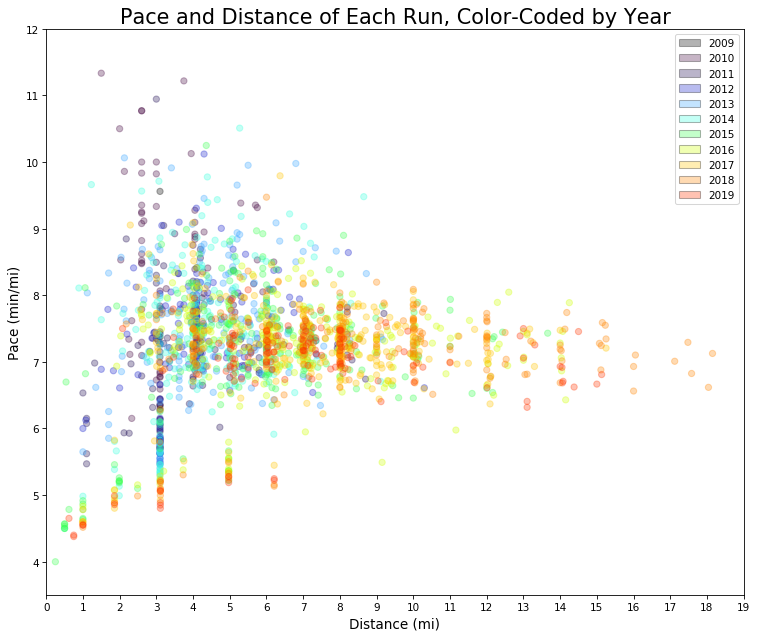

In [74]:
col_dict = {'2009':'#000000', '2010':'#450842', '2011':'#1B0951', '2012':'#1620CD' , '2013':'#3AA6FF' , '2014':'#3AFFDE' , '2015':'#3AFF51' , '2016':'#D0FF00', '2017':'#FFC600', '2018':'#FF8600', '2019':'#FF3600'}
ymd['colcol'] = ymd['year'].map(col_dict)

fig = plt.figure(figsize=(12,10),dpi=75)
plt.xticks(np.arange(0, max(d['Mileage'])+1, 1.0))
plt.xlim(0,19)
plt.ylim(3.5, 12)
ax = fig.gca()
ax.scatter(ymd['Mileage'],ymd['pace_min'],c=ymd['colcol'],alpha=0.3)
ax.set_xlabel('Distance (mi)', fontsize=13)
ax.set_ylabel('Pace (min/mi)', fontsize=13)
ax.set_title('Pace and Distance of Each Run, Color-Coded by Year', fontsize=20)

#retrieve values from color dictionary and attribute it to corresponding labels
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.3) for key, value in col_dict.items()]
ax.legend(handles = leg_el)
plt.savefig("pace_distance.png")

In [83]:
ymdna = ymd.dropna()
print(ymdna)

            Date  Mileage time_corr   pace_min  year month day   colcol
0     2009-04-25     3.10   0:29:38   9.559140  2009    04  25  #000000
1     2009-11-21     3.10   0:22:51   7.370968  2009    11  21  #000000
2     2010-01-04     1.30   0:17:00  13.076923  2010    01  04  #450842
3     2010-01-05     2.60   0:28:00  10.769231  2010    01  05  #450842
4     2010-01-07     2.60   0:28:00  10.769231  2010    01  07  #450842
6     2010-01-14     2.60   0:26:00  10.000000  2010    01  14  #450842
7     2010-01-16     4.05   0:35:48   8.839506  2010    01  16  #450842
8     2010-01-19     2.60   0:24:00   9.230769  2010    01  19  #450842
9     2010-01-25     2.66   0:24:15   9.116541  2010    01  25  #450842
10    2010-01-26     2.60   0:24:19   9.352564  2010    01  26  #450842
...          ...      ...       ...        ...   ...   ...  ..      ...
2370  2019-11-21     6.21   0:44:23   7.147075  2019    11  21  #FF3600
2371  2019-11-22     8.22   0:58:04   7.064071  2019    11  22  

(0, 19)

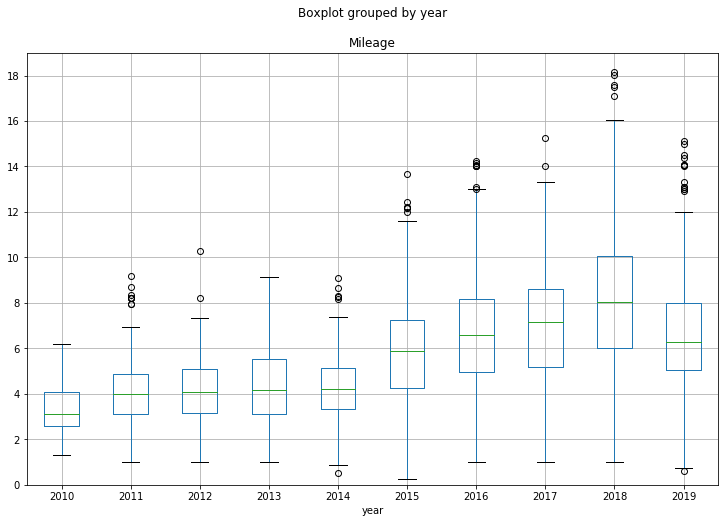

In [135]:
ymd2010s = ymdna[(ymdna['year'] != '2009')]

ymd2010s.boxplot('Mileage', by='year', figsize=(12, 8))
plt.yticks(np.arange(0, max(ymd2010s['Mileage'])+1, 2.0))
plt.ylim(0,19)

In [127]:
dist_by_yr = ols('Mileage ~ C(year)', data=ymd2010s).fit()
dist_by_yr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mileage   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     73.20
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          2.13e-115
Time:                        15:41:06   Log-Likelihood:                -4208.3
No. Observations:                1815   AIC:                             8437.
Df Residuals:                    1805   BIC:                             8492.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5200      0.277     12.689      0.000       2.976       4.064
C(year)[T.2011]     0.6137      0.360      1.703      0.089      -0.093       1.320
C(year)[T.2012]     0.8142      0.344      2.364      0.018       0.139       1.490
C(year)[T.2013]     0.8469      0.344      2.462      0.014       0.172       1.522
C(year)[T.2014]     0.8816      0.326      2.704      0.007       0.242       1.521
C(year)[T.2015]     2.3114      0.320      7.224      0.000       1.684       2.939
C(year)[T.2016]     3.3518      0.319     10.518      0.000       2.727       3.977
C(year)[T.2017]     3.5063      0.316     11.099      0.000       2.887       4.126
C(year)[T.2018]     4.8516      0.324     14.984      0.000       4.217       5.487
C(year)[T.2019]     3.3007      0.342      9.641      0.000       2.629       3.972
==============================================================================
Omnibus:                      116.899   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.260
Skew:                           0.502   Prob(JB):                     7.99e-42
Kurtosis:                       4.223   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(3.5, 15.5)

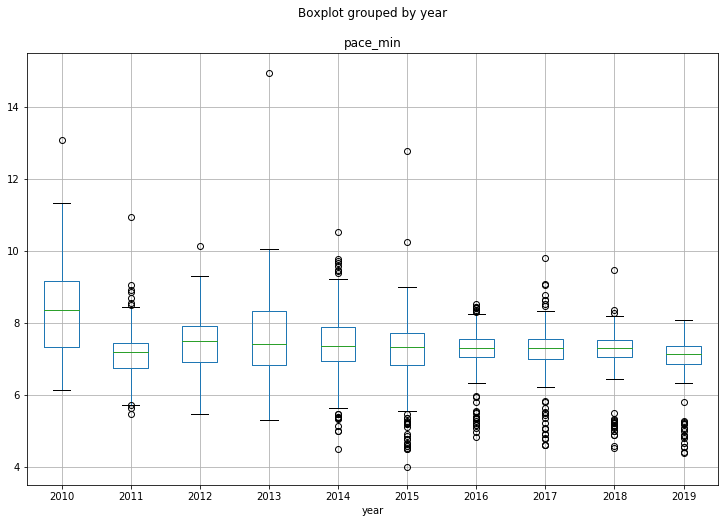

In [136]:
ymd2010s.boxplot('pace_min', by='year', figsize=(12, 8))
plt.ylim(3.5,15.5)

In [129]:
pace_by_yr = ols('pace_min ~ C(year)', data=ymd2010s).fit()
pace_by_yr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pace_min   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     18.04
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           5.61e-29
Time:                        15:42:22   Log-Likelihood:                -2377.8
No. Observations:                1815   AIC:                             4776.
Df Residuals:                    1805   BIC:                             4831.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3414      0.101     82.440      0.000       8.143       8.540
C(year)[T.2011]    -1.1753      0.131     -8.944      0.000      -1.433      -0.918
C(year)[T.2012]    -0.9910      0.126     -7.890      0.000      -1.237      -0.745
C(year)[T.2013]    -0.7923      0.125     -6.315      0.000      -1.038      -0.546
C(year)[T.2014]    -0.9320      0.119     -7.836      0.000      -1.165      -0.699
C(year)[T.2015]    -1.1536      0.117     -9.884      0.000      -1.383      -0.925
C(year)[T.2016]    -1.1178      0.116     -9.616      0.000      -1.346      -0.890
C(year)[T.2017]    -1.1148      0.115     -9.674      0.000      -1.341      -0.889
C(year)[T.2018]    -1.1665      0.118     -9.877      0.000      -1.398      -0.935
C(year)[T.2019]    -1.4271      0.125    -11.429      0.000      -1.672      -1.182
==============================================================================
Omnibus:                      199.009   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1715.762
Skew:                           0.014   Prob(JB):                         0.00
Kurtosis:                       7.763   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
ymd2011on = ymd2010s[(ymd2010s['year'] != '2010')]
pace_by_yr2011 = ols('pace_min ~ C(year)', data=ymd2011on).fit()
pace_by_yr2011.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pace_min   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     6.565
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.82e-08
Time:                        15:43:57   Log-Likelihood:                -2224.5
No. Observations:                1736   AIC:                             4467.
Df Residuals:                    1727   BIC:                             4516.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.1661      0.081     87.950      0.000       7.006       7.326
C(year)[T.2012]     0.1843      0.109      1.692      0.091      -0.029       0.398
C(year)[T.2013]     0.3831      0.109      3.522      0.000       0.170       0.596
C(year)[T.2014]     0.2434      0.102      2.395      0.017       0.044       0.443
C(year)[T.2015]     0.0217      0.099      0.219      0.827      -0.173       0.216
C(year)[T.2016]     0.0575      0.099      0.583      0.560      -0.136       0.251
C(year)[T.2017]     0.0605      0.098      0.621      0.535      -0.131       0.252
C(year)[T.2018]     0.0089      0.101      0.088      0.930      -0.189       0.206
C(year)[T.2019]    -0.2518      0.108     -2.328      0.020      -0.464      -0.040
==============================================================================
Omnibus:                      205.318   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1916.228
Skew:                          -0.101   Prob(JB):                         0.00
Kurtosis:                       8.143   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

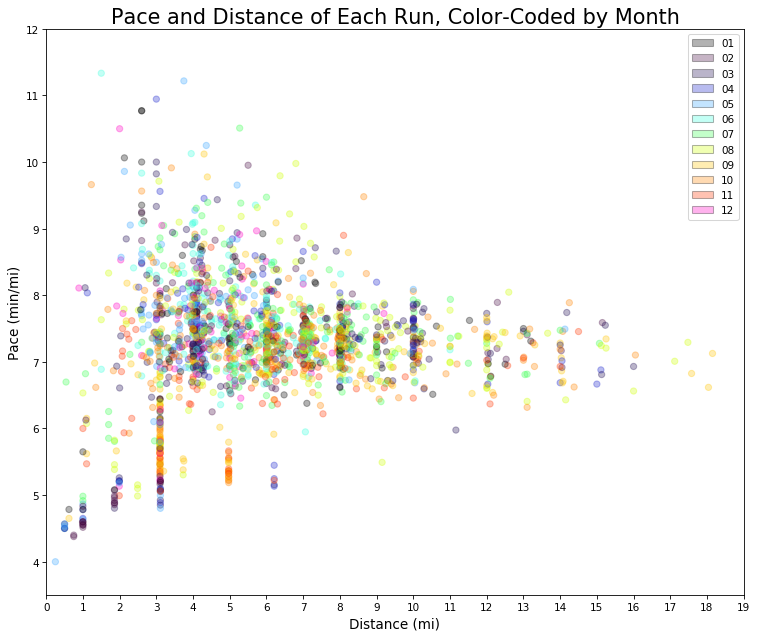

In [137]:
mcol_dict = {'01':'#000000', '02':'#450842', '03':'#1B0951', '04':'#1620CD' , '05':'#3AA6FF' , '06':'#3AFFDE' , '07':'#3AFF51' , '08':'#D0FF00', '09':'#FFC600', '10':'#FF8600', '11':'#FF3600', '12':'#FF00C6'}
ymd['colcolm'] = ymd['month'].map(mcol_dict)

mfig = plt.figure(figsize=(12,10),dpi=75)
plt.xticks(np.arange(0, max(d['Mileage'])+1, 1.0))
plt.xlim(0,19)
plt.ylim(3.5, 12)
axm = mfig.gca()
axm.scatter(ymd['Mileage'],ymd['pace_min'],c=ymd['colcolm'],alpha=0.3)
axm.set_xlabel('Distance (mi)', fontsize=13)
axm.set_ylabel('Pace (min/mi)', fontsize=13)
axm.set_title('Pace and Distance of Each Run, Color-Coded by Month', fontsize=20)

#retrieve values from color dictionary and attribute it to corresponding labels
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.3) for key, value in mcol_dict.items()]
axm.legend(handles = leg_el)
plt.savefig("pace_distance_month.png")

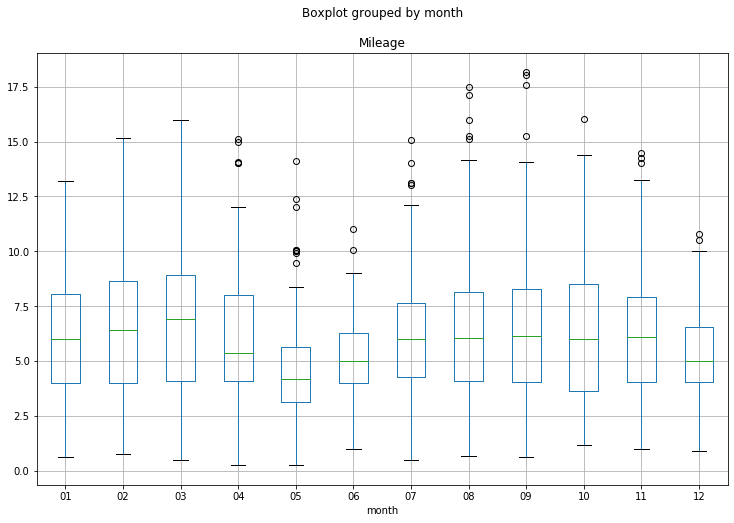

In [139]:
ymd.boxplot('Mileage', by='month', figsize=(12, 8))

In [141]:
dist_by_month = ols('Mileage ~ C(month)', data=ymd).fit()
dist_by_month.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mileage   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.718
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           2.50e-15
Time:                        16:08:48   Log-Likelihood:                -5893.8
No. Observations:                2383   AIC:                         1.181e+04
Df Residuals:                    2371   BIC:                         1.188e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.2286      0.210     29.681      0.000       5.817       6.640
C(month)[T.02]     0.1046      0.299      0.350      0.727      -0.482       0.691
C(month)[T.03]     0.4643      0.298      1.556      0.120      -0.121       1.049
C(month)[T.04]    -0.3915      0.308     -1.269      0.205      -0.996       0.213
C(month)[T.05]    -1.5340      0.321     -4.785      0.000      -2.163      -0.905
C(month)[T.06]    -1.1097      0.299     -3.709      0.000      -1.696      -0.523
C(month)[T.07]    -0.2091      0.285     -0.734      0.463      -0.768       0.350
C(month)[T.08]     0.1517      0.274      0.553      0.580      -0.386       0.690
C(month)[T.09]     0.4748      0.275      1.724      0.085      -0.065       1.015
C(month)[T.10]     0.1888      0.276      0.685      0.494      -0.352       0.729
C(month)[T.11]    -0.0803      0.294     -0.273      0.785      -0.658       0.497
C(month)[T.12]    -1.0045      0.319     -3.146      0.002      -1.631      -0.378
==============================================================================
Omnibus:                      142.625   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.245
Skew:                           0.613   Prob(JB):                     1.77e-37
Kurtosis:                       3.449   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

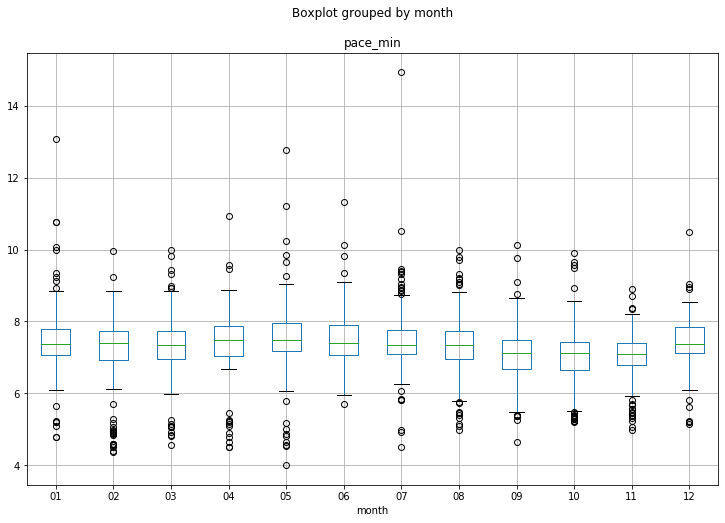

In [142]:
ymd.boxplot('pace_min', by='month', figsize=(12, 8))

In [143]:
pace_by_month = ols('pace_min ~ C(month)', data=ymd).fit()
pace_by_month.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pace_min   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     8.066
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           6.95e-14
Time:                        16:10:57   Log-Likelihood:                -2417.0
No. Observations:                1817   AIC:                             4858.
Df Residuals:                    1805   BIC:                             4924.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.4862      0.080     93.325      0.000       7.329       7.644
C(month)[T.02]    -0.3534      0.114     -3.109      0.002      -0.576      -0.130
C(month)[T.03]    -0.1577      0.114     -1.385      0.166      -0.381       0.066
C(month)[T.04]    -0.1251      0.119     -1.051      0.293      -0.359       0.108
C(month)[T.05]     0.0475      0.120      0.395      0.693      -0.188       0.283
C(month)[T.06]     0.0725      0.107      0.675      0.500      -0.138       0.283
C(month)[T.07]    -0.0109      0.104     -0.105      0.916      -0.215       0.194
C(month)[T.08]    -0.1481      0.103     -1.445      0.149      -0.349       0.053
C(month)[T.09]    -0.4556      0.103     -4.427      0.000      -0.657      -0.254
C(month)[T.10]    -0.4716      0.104     -4.552      0.000      -0.675      -0.268
C(month)[T.11]    -0.4591      0.111     -4.148      0.000      -0.676      -0.242
C(month)[T.12]    -0.0575      0.120     -0.479      0.632      -0.293       0.178
==============================================================================
Omnibus:                      243.662   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2148.981
Skew:                           0.308   Prob(JB):                         0.00
Kurtosis:                       8.292   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""